In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Install_csv and EDA

In [2]:
installs_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\installs.csv')
len(installs_df)

216888

In [3]:
installs_df.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11


In [25]:
install_app = installs_df.groupby(['install_id','app_id']).agg({'install_id': ['count'],'app_id':['count']})\
    .rename(columns={'install_id':'install_count','app_id':'app_count'}).sort_values(ascending=False,by=['app_id']).reset_index()
install_app
# .size().sort_values(ascending=False).reset_index(name='country_count_per_id')

,install_id,app_id,install_count,app_count
,,,count,count
0,9d6f82d11e310d98b90348715087fd9aa1e5f3e8cff30e...,408,1,1
1,bc68c44ff8662aad8d9e67dd84675ab211efaaf19ce747...,408,1,1
2,ef13609c277f22cf0831e219983bc84be61978528a11a8...,408,1,1
3,51c1061de7998c3a35141ed3ba4b06a1b7af240d842cd3...,408,1,1
4,bc974875a4964721951d3af72bf74bf58606b62b9bba4c...,408,1,1
...,...,...,...,...
216882,b0004a3d17057319223b7ca102d646ab584f29a58aacad...,71,1,1
216883,1219c3b3a8628e50199e174a978a2d6609d4577ef04241...,71,1,1
216884,1219656bd87400dfaa9469aece07cb054186dc7a83bb35...,71,1,1


In [4]:
installs_df.event_date.sort_values()

193106    2022-01-01
124603    2022-01-01
186286    2022-01-01
183117    2022-01-01
207947    2022-01-01
             ...    
23307     2022-12-31
30729     2022-12-31
184373    2022-12-31
209197    2022-12-31
30908     2022-12-31
Name: event_date, Length: 216888, dtype: object

In [26]:
country_count = installs_df.groupby(['country_id']).size().sort_values(ascending=False).reset_index(name='country_count_per_id')

,country_id,country_count_per_id
0,1,135242
1,109,61841
2,17,10671
3,213,9134


In [36]:
install_per_country= installs_df.groupby(['country_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_country')



In [51]:
device_os = installs_df.groupby(['device_os_version']).size().sort_values(ascending=False).reset_index(name='os_version')
device_os

,device_os_version,os_version
0,11,79355
1,12,56679
2,10,45660
3,9,16285
4,8.0.0,5736
...,...,...
76,15.1.1,1
77,4.9.77+,1
78,4.9.227-22722052,1
79,4.9.227-21443963,1


In [44]:

network = installs_df.groupby(['network_id']).size().sort_values(ascending=False).reset_index(name='networks_counts')


In [45]:
network

,network_id,networks
0,60,110463
1,26,73979
2,10,26345
3,1111,6101


In [39]:
install_per_country.dtypes

country_id              int64
installs_per_country    int64
dtype: object

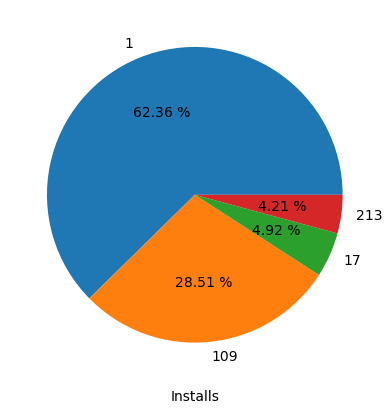

In [42]:
plt.pie(x="installs_per_country",labels="country_id", data=install_per_country, autopct="%.2f %%")
plt.xlabel("Installs")
plt.show()

In [27]:
installs_df.groupby(['app_id']).size().sort_values(ascending=False).reset_index(name='app_count_per_id')

,app_id,app_count_per_id
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


In [23]:
installs_df.groupby(['install_id']).size().sort_values(ascending=False).reset_index(name='install_count')

,install_id,install_count
0,1c58d3e7cabdedd63737a5e99b7ccc27c42e47cbb85b74...,2
1,0000489f6697ab477e9fae03ab0edc6eb6c79e30c9675f...,1
2,ab364f5872942656c0c459fc15bb9245db0c3e9a1f0bdb...,1
3,ab34384c875c702dccfa12523ad5cc9fe28abec68aaa25...,1
4,ab34a2823057dbbd154b8d502c1334dd928af48641c043...,1
...,...,...
216882,557957562b48e043efdeac39428df17e68a07b343184b7...,1
216883,557a2fb115d359daf5f7608c405da61fc8927c1c839838...,1
216884,557a4162faf08e19811578c0f3a3818895c58a5c0f59f7...,1
216885,557a42ede81d95323bcb55c0767329c14c66c01364245e...,1


In [33]:
installs_df['install_id'].nunique(),installs_df['app_id'].nunique()
install_per_app_count= installs_df.groupby(['app_id'])['install_id'].size().sort_values(ascending=False).reset_index(name='installs_per_app_count')
install_per_app_count

,app_id,installs_per_app_count
0,174,47416
1,121,39868
2,94,32265
3,189,10082
4,71,8300
5,122,7955
6,154,7694
7,97,7370
8,256,6184
9,104,5286


#### Summary of Installs_csv

- There are 51 unique apps in install_csv
- There are 4 countries where apps were installed
- There are 4 unique mobile ad networks
- There are 81 mobile os

## Revenue

In [53]:
revenue_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\revenue.csv')

In [59]:
revenue_df.head()

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400


In [65]:
# Top 20 installs by their revenue sum
revenue_df.groupby(["install_id"])['value_usd'].sum().sort_values(ascending=False).reset_index(name='revenue_sum').head(20)

,install_id,revenue_sum
0,b18e32862277cef10fc4f9956671506a888ac19492a0ad...,133.430000
1,ea6b90cc2d2f7e5fcf16eb5b8832111757f1f8f85ab3e7...,95.824843
2,3d5869a49129728cc6086b0d0e9b7d2aa98c4e597e4614...,90.628147
3,3f885b64b8c190673d5c1ee17ffb881c934a6c5cf4c079...,90.413146
4,58386b3403601d1895438ef3fd38279e23db746540bee9...,86.049419
5,c1aa5dda50f680762f24e1961191aee180e3940d4149de...,85.320585
6,f31f1023ac055d4bec20567216c3d2e4251c51fb51c461...,84.515213
7,b04f7c8bc33ef4e6acbbe05f0a2225ba936f50ce9f525d...,83.710000
8,8ef2c9e1f6ef0b07c66a88ec741ad8b2b9ec283838de7e...,82.491656
9,0a2a0fa90cf5dd6ebaa7dd58b23c1d012ead9ad651b90b...,81.530000


#### Joining revenue data with installs data

In [26]:
revenue_install_df = pd.merge(installs_df,revenue_df,on=['install_id','event_date'])

In [28]:
len(revenue_install_df)

1004748

In [33]:
revenue_install_df.head()

,install_id,country_id,app_id,network_id,event_date,device_os_version,value_usd
0,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,2.000000e-03
1,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,2.190000e-03
2,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,4.999999e-04
3,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,5.252659e-12
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,-9.499490e-11


In [36]:
revenue_install_df.event_date.min(),revenue_install_df.event_date.max()

('2022-01-01', '2022-12-31')

## Adspend

In [15]:
adspend_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\adspend.csv')
adspend_df.head()

,event_date,country_id,network_id,client_id,value_usd
0,2022-01-01,1,10,71,4.680000
1,2022-01-01,1,10,94,223.439997
2,2022-01-01,1,10,104,0.800000
3,2022-01-01,1,10,121,4.870000
4,2022-01-01,1,10,174,1.300000


## Payout

In [16]:
payouts_df = pd.read_csv(r'D:\JustDice-Analytics-Engineer-Hiring-Case-main\payouts.csv')
payouts_df.head()

,install_id,event_date,value_usd
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416
4,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416


#### Joining revenue with payout

In [45]:
revenue_payout_df = pd.merge(payouts_df,revenue_df,on=['install_id','event_date'],suffixes=('_payout','_revenue'))

In [46]:
revenue_payout_df

,install_id,event_date,value_usd_payout,value_usd_revenue
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,0.76
1,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,1.17
2,5d1ce288f9dbc98745bb235b3ffd32a0cf906fcdb52e7b...,2022-12-05,0.358292,1.08
3,f4cd839669220bdad4a5e9a166d424ec02c45d4ede3bb6...,2022-12-21,0.360366,0.54
4,af81e3ac1841ab9493640a559c44821d4bd1f1a610262e...,2022-12-04,0.706046,3.15
...,...,...,...,...
34174,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,2022-01-27,0.383418,0.73
34175,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368,3.15
34176,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368,3.15
34177,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.384336,3.15
